In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML470_S3_Diabetes_Data_Preprocessed_Concept.xlsx")

col = df.select_dtypes(include=np.number).columns[0]
series = df[col]

print("Using column:", col)

Using column: Fasting blood


In [18]:
series.index = pd.date_range(
    start="1988-01-01",
    periods=len(series),
    freq="M"
)

C:\Users\HP\AppData\Local\Temp\ipykernel_18336\2715841663.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series.index = pd.date_range(


In [19]:
train_size = int(len(series) * 0.8)

train = series.iloc[:train_size]
test = series.iloc[train_size:]

In [20]:
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Fasting blood   No. Observations:                  601
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -861.663
Date:                Fri, 30 Jan 2026   AIC                           1733.327
Time:                        11:48:41   BIC                           1755.311
Sample:                    01-31-1988   HQIC                          1741.885
                         - 01-31-2038                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9065      0.251     -3.611      0.000      -1.399      -0.415
ar.L2          0.0477      0.040      1.193      0.233      -0.031       0.126
ma.L1         -0.0480      0.250     -0.192      0.8

In [21]:
ljung_box = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)
print("\nLjung-Box Test:\n", ljung_box)


Ljung-Box Test:
      lb_stat  lb_pvalue
10  4.388176   0.928142


In [22]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

In [23]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nMAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE : 0.751340875531347
RMSE: 0.9491135087979957
MAPE: 103.94448416657988


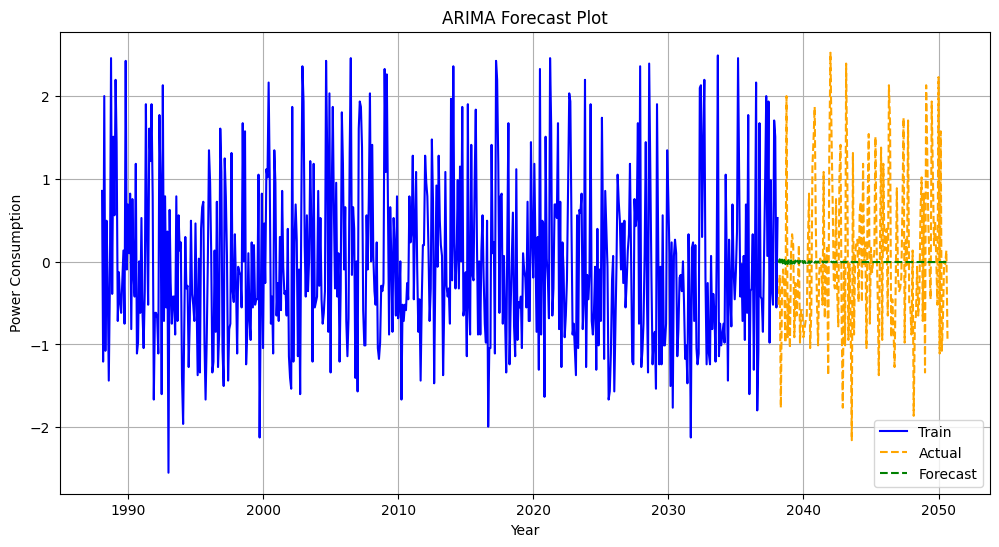

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Actual", color="orange", linestyle="--")
plt.plot(forecast.index, forecast, label="Forecast", color="green", linestyle="--")

plt.title("ARIMA Forecast Plot")
plt.xlabel("Year")
plt.ylabel("Power Consumption")
plt.legend()
plt.grid()
plt.show()

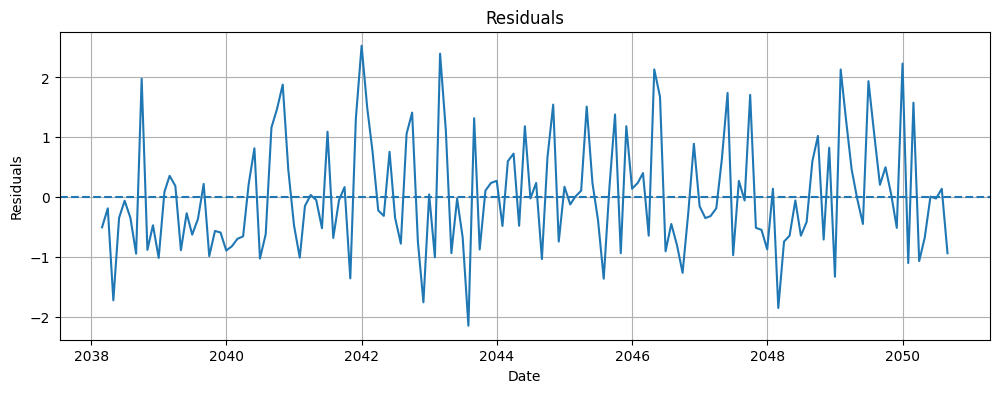

In [25]:
residuals = test - forecast

plt.figure(figsize=(12, 4))
plt.plot(residuals.index, residuals)
plt.axhline(0, linestyle="--")

plt.title("Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid()
plt.show()